# 3C454.3 analysis notebook
## Prerequisities: in order to run this notebook you need the AGILE data.

In [1]:
from agilepy.api.AGAnalysis import AGAnalysis

In [2]:
from os.path import expandvars
from pathlib import Path
import shutil

In [3]:
%matplotlib notebook

## Analysis name

In [4]:
user = "bulgarelli"
analysisdate = "20101110"
sourceName = "3C454d3"
analysisname = user+"_"+analysisdate+"_"+sourceName
print("Analysis:",analysisname)

Analysis: bulgarelli_20101110_3C454d3


## Output directory

In [5]:
outDir = expandvars(f"$HOME/agilepy_analysis/{analysisname}/output")

if Path(outDir).exists():
    print("Deleting",outDir)
    shutil.rmtree(outDir)
else:
    print("Output directory:",outDir)

Output directory: /home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output


## Configuration 

In [6]:
tmin = 55513.0 # 2010-11-05 00:00:00.000 UTC
tmax = 55520.0 # 	2010-12-05 00:00:00.000 UTC
timetype = "MJD" # "MJD" OR "TT"
glon = 86.11
glat = -38.18

In [7]:
config = """
input:
  evtfile: /AGILE_PROC3/FM3.119_ASDC2/INDEX/EVT.index
  logfile: /AGILE_PROC3/DATA_ASDC2/INDEX/LOG.log.index

output:
  outdir: %s
  filenameprefix: %s_product
  logfilenameprefix: %s_log
  verboselvl: 1

selection:
  tmin: %f
  tmax: %f
  timetype: %s
  glon: %f
  glat: %f
  fovradmax: 60
  albedorad: 80
  proj: ARC
  
maps:
  mapsize: 40
  spectralindex: 2.1
  timestep: 160
  binsize: 0.25
  energybins:
    - 100, 10000
  fovbinnumber: 1
  

model:
  modelfile: null
  galmode: 1
  isomode: 1
  galcoeff: null
  isocoeff: null
  emin_sources: 100
  emax_sources: 10000


mle:
  ranal: 10
  ulcl: 2
  loccl: 95
  expratioevaluation: yes
  expratio_minthr: 0
  expratio_maxthr: 15
  expratio_size: 10  
  
"""%(outDir, analysisname, analysisname, tmin, tmax, timetype, glon, glat)

with open("./agilepy_conf.yaml", "w") as cf:
    cf.write(config)

## Obtaining the AGAnalysis object

In [8]:
ag = AGAnalysis("./agilepy_conf.yaml")

2020-03-09 18:12:50,263 [INFO    ] [AgilepyLogger] File and Console loggers are active. Log file: /home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/logs/bulgarelli_20101110_3C454d3_log_20200309-181250.log


## Sources hypothesis

In [9]:
sources = ag.loadSourcesFromCAT2(rangeDist = (0, 5))

2020-03-09 18:12:50,557 [INFO    ] [SourcesLibrary] Loaded 2 sources. Total sources: 2


In [10]:
for s in sources:
    print(s)


-----------------------------------------------------------
Source name: 2AGLJ2247+1558 (PointSource)
  * Position:
	- start_pos: (84.2229, -37.4782)
	- dist from (l,b): 1.6474
  * Spectrum: (PowerLaw)
	- flux: 6.05327e-08
	- index: 2.75651
  * Free params: none
-----------------------------------------------------------

-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource)
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: none
-----------------------------------------------------------


## Adding a source at runtime

In [11]:
#newSourceDict = {
#    "glon" : 79.3,
#    "glat": 0.554,
#    "spectrumType" : "PowerLaw",
#    "flux": 1.69737e-07,
#    "index": 2.1
#}

#s = ag.addSource("CYGX3", newSourceDict)

#print(s)

## Deleting sources
Selection params = [name, dist, flux, sqrtts]

In [12]:
deletedSources = ag.deleteSources('flux <= 10e-08')

2020-03-09 18:12:51,331 [INFO    ] [SourcesLibrary] Deleted 1 sources.


## Selecting sources

In [13]:
sources = ag.selectSources("flux > 0")


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource)
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: none
-----------------------------------------------------------


## Free a source's parameter
Freeable params = [flux, index, index1, index2, cutoffEnergy, pivotEnergy, curvature, index2]

In [14]:
affectedSources = ag.freeSources('name == "2AGLJ2254+1609"', "flux", True)

In this example, only one source is affected.

In [15]:
for source in affectedSources:
    print(source)


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource)
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: flux
-----------------------------------------------------------


## Analysis

In [16]:
ag.generateMaps()

2020-03-09 18:12:52,594 [INFO    ] [CtsMapGenerator] Science tool called!
2020-03-09 18:12:56,951 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/maps/bulgarelli_20101110_3C454d3_product_EMIN00100_EMAX10000_01.cts.gz']
2020-03-09 18:12:56,953 [INFO    ] [ExpMapGenerator] Science tool called!
2020-03-09 18:13:21,692 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/maps/bulgarelli_20101110_3C454d3_product_EMIN00100_EMAX10000_01.exp.gz']
2020-03-09 18:13:21,695 [INFO    ] [GasMapGenerator] Science tool called!
2020-03-09 18:13:22,751 [INFO    ] [AGAnalysis] Science tool gasMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/maps/bulgarelli_20101110_3C454d3_product_EMIN00100_EMAX10000_01.gas.gz']
2020-03-09 18:13:22,753 [INFO    ] [IntMapGenerator] Science tool called!
2020-03-09 18:13:23,056 [INFO   

'/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/bulgarelli_20101110_3C454d3_product.maplist4'

In [17]:
! cat /home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/bulgarelli_20101110_3C454d3_product.maplist4

/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/maps/bulgarelli_20101110_3C454d3_product_EMIN00100_EMAX10000_01.cts.gz /home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/maps/bulgarelli_20101110_3C454d3_product_EMIN00100_EMAX10000_01.exp.gz /home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/maps/bulgarelli_20101110_3C454d3_product_EMIN00100_EMAX10000_01.gas.gz 30 -1 -1


2020-03-09 18:13:23,198 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


<IPython.core.display.Javascript object>


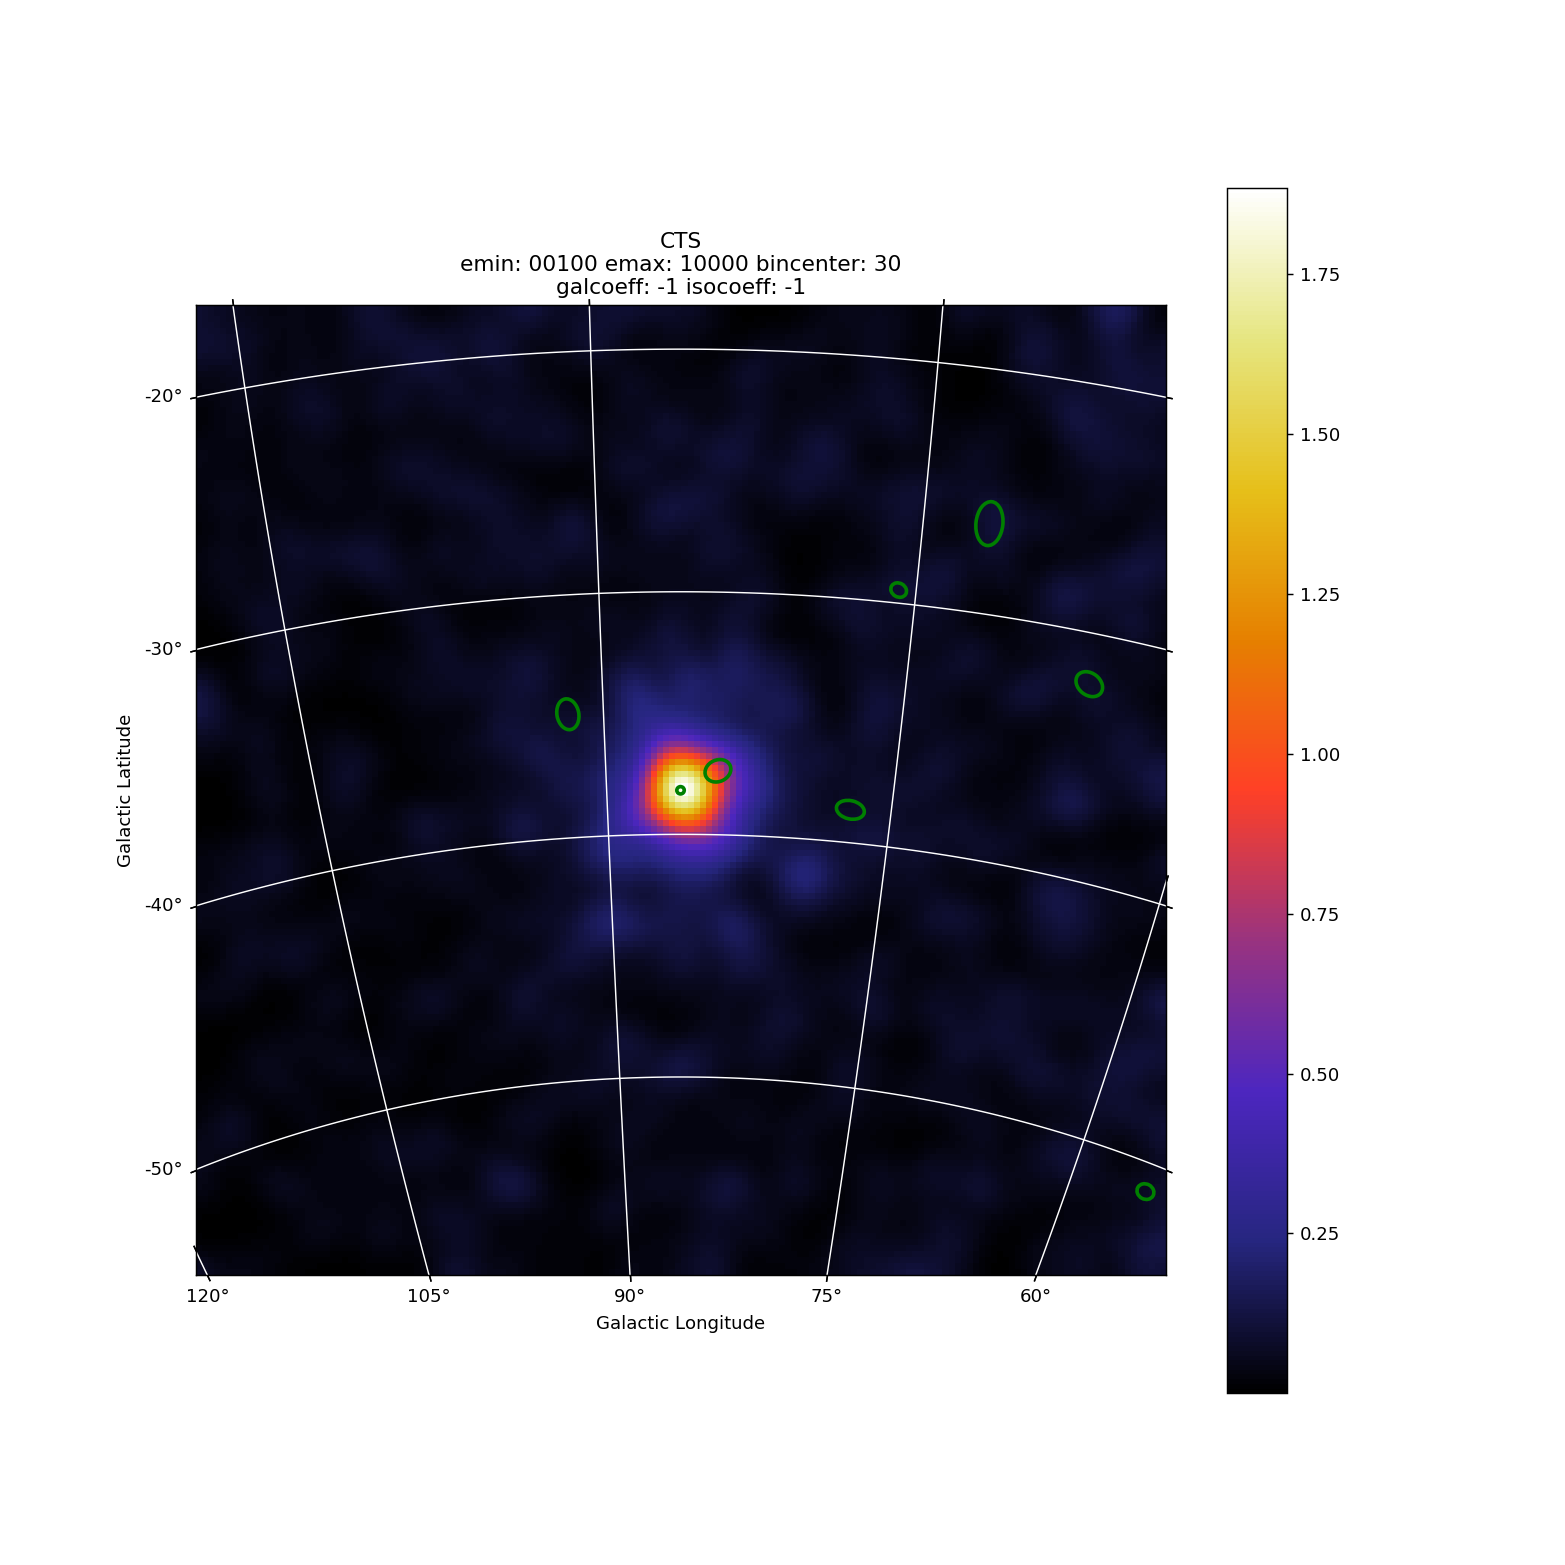

/home/rt/.conda/envs/agilepy/lib/python3.7/site-packages/regions/shapes/ellipse.py:213: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  **mpl_params)


[None]

In [18]:
ag.displayCtsSkyMaps(smooth=True, sigma=3, regFilePath="$AGILE/catalogs/2AGL_2.reg")

2020-03-09 18:13:24,226 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


<IPython.core.display.Javascript object>


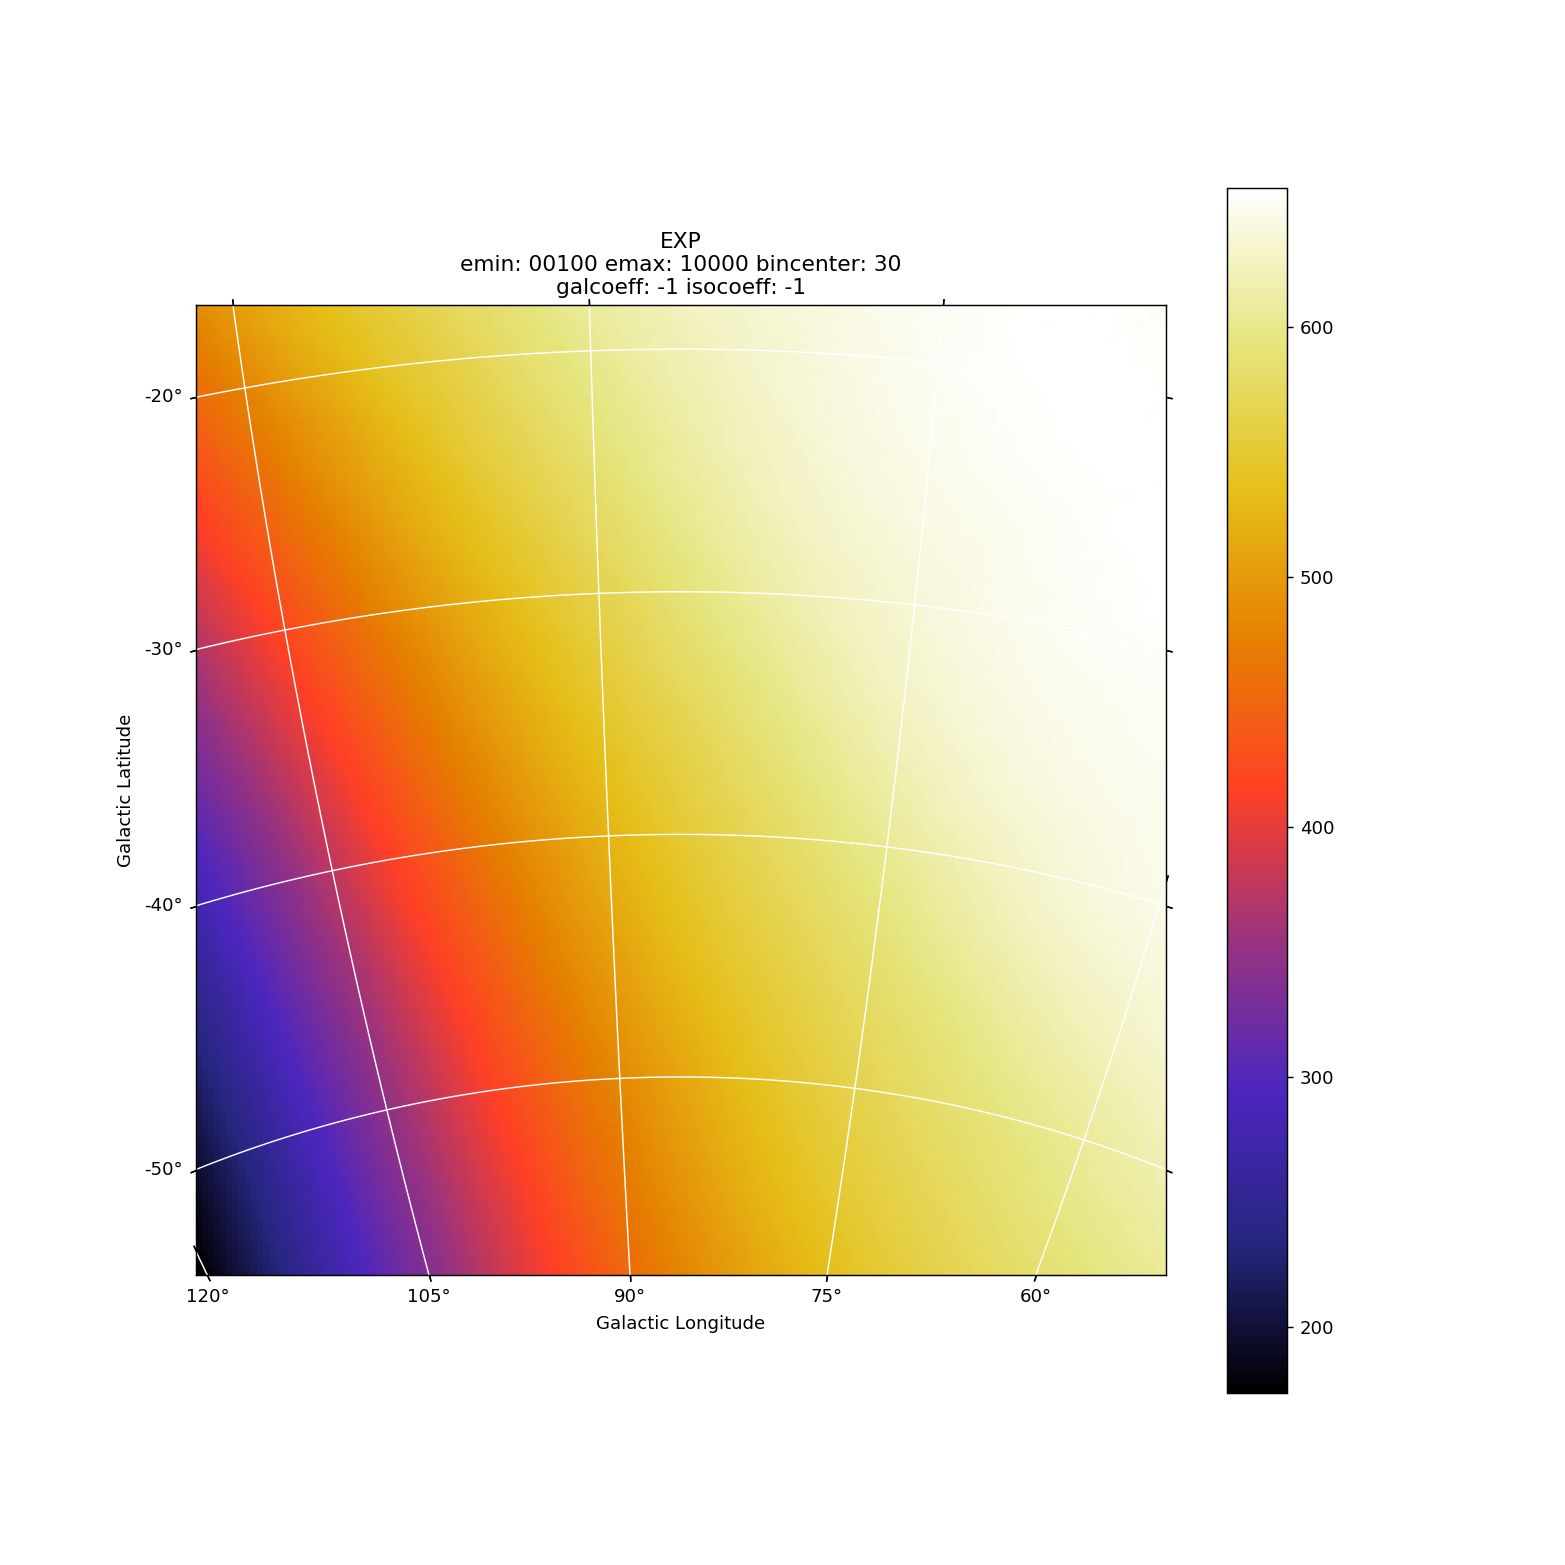

[None]

In [19]:
ag.displayExpSkyMaps()

In [ ]:
ag.displayGasSkyMaps()

In [20]:
ag.setOptions(galcoeff=[0])

In [21]:
ag.printOptions("model")

{ 'emax_sources': 10000,
  'emin_sources': 100,
  'galcoeff': [0],
  'galmode': 1,
  'galmode2': 0,
  'galmode2fit': 0,
  'isocoeff': [-1],
  'isomode': 1,
  'isomode2': 0,
  'isomode2fit': 0,
  'modelfile': None}


In [22]:
! cat /home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/bulgarelli_20101110_3C454d3_product.maplist4

/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/maps/bulgarelli_20101110_3C454d3_product_EMIN00100_EMAX10000_01.cts.gz /home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/maps/bulgarelli_20101110_3C454d3_product_EMIN00100_EMAX10000_01.exp.gz /home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/maps/bulgarelli_20101110_3C454d3_product_EMIN00100_EMAX10000_01.gas.gz 30 0 -1


In [23]:
ag.calcBkg("2AGLJ2254+1609")

2020-03-09 18:15:13,880 [INFO    ] [AGAnalysis] tmin: 215481600.000000 tmax: 216691200.000000 type: TT
2020-03-09 18:15:13,883 [INFO    ] [CtsMapGenerator] Science tool called!
2020-03-09 18:15:18,784 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/calcBkg/maps/calcBkg_EMIN00100_EMAX10000_01.cts.gz']
2020-03-09 18:15:18,786 [INFO    ] [ExpMapGenerator] Science tool called!
2020-03-09 18:16:06,685 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/calcBkg/maps/calcBkg_EMIN00100_EMAX10000_01.exp.gz']
2020-03-09 18:16:06,687 [INFO    ] [GasMapGenerator] Science tool called!
2020-03-09 18:16:07,682 [INFO    ] [AGAnalysis] Science tool gasMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/calcBkg/maps/calcBkg_EMIN00100_EMAX10000_01.gas.gz']
2020-03-09 18:16:07,684 [INFO    ] [IntMapGenerator] Science to

([10.0539], [6.96609e-08])

In [24]:
ag.mle()

2020-03-09 18:17:38,084 [INFO    ] [SourcesLibrary] File /home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/sourceLibrary00000.txt has been produced
2020-03-09 18:17:38,085 [INFO    ] [Multi] Science tool called!
2020-03-09 18:17:38,623 [INFO    ] [AGAnalysis] AG_multi produced: ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/mle/bulgarelli_20101110_3C454d3_product0000_2AGLJ2254+1609.source']
2020-03-09 18:17:38,627 [INFO    ] [AGAnalysis] Took 0.545024 seconds.


['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/mle/bulgarelli_20101110_3C454d3_product0000_2AGLJ2254+1609.source']

In [25]:
ag.selectSources("sqrtTS > 0")


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 37.7361
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: flux
  * Multi analysis:
	- flux: 1.45398e-05 +- 7.54683e-07
	- upper limit: 1.60933e-05
	- ergLog: 2.34987e-09 +- 1.21969e-10
	- galCoeff: [6.96609e-08]
	- isoCoeff: [10.0539]
-----------------------------------------------------------


In [26]:
ag.printOptions("model")

{ 'emax_sources': 10000,
  'emin_sources': 100,
  'galcoeff': [6.96609e-08],
  'galmode': 1,
  'galmode2': 0,
  'galmode2fit': 0,
  'isocoeff': [10.0539],
  'isomode': 1,
  'isomode2': 0,
  'isomode2fit': 0,
  'modelfile': None}


In [27]:
ag.setOptions(isocoeff=[8.76633])

In [28]:
ag.mle()

2020-03-09 18:17:52,905 [INFO    ] [SourcesLibrary] File /home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/sourceLibrary00000.txt has been produced
2020-03-09 18:17:52,906 [INFO    ] [Multi] Science tool called!
2020-03-09 18:17:53,450 [INFO    ] [AGAnalysis] AG_multi produced: ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/mle/bulgarelli_20101110_3C454d3_product0000_2AGLJ2254+1609.source']
2020-03-09 18:17:53,454 [INFO    ] [AGAnalysis] Took 0.550714 seconds.


['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/mle/bulgarelli_20101110_3C454d3_product0000_2AGLJ2254+1609.source']

In [29]:
ag.selectSources("sqrtTS > 0")


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 39.473
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: flux
  * Multi analysis:
	- flux: 1.51134e-05 +- 7.63343e-07
	- upper limit: 1.66839e-05
	- ergLog: 2.44256e-09 +- 1.23369e-10
	- galCoeff: [6.96609e-08]
	- isoCoeff: [8.76633]
-----------------------------------------------------------


In [30]:
ag.lightCurve("2AGLJ2254+1609", binsize=86400)

2020-03-09 18:18:01,607 [INFO    ] [AGAnalysis] Number of processes: 1, Number of bins per process 7
2020-03-09 18:18:01,611 [INFO    ] [CtsMapGenerator] Science tool called!
2020-03-09 18:18:04,139 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/lc/bin_216691200_216777600/maps/lc_analysis_EMIN00100_EMAX10000_01.cts.gz']
2020-03-09 18:18:04,142 [INFO    ] [ExpMapGenerator] Science tool called!
2020-03-09 18:18:10,233 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/lc/bin_216691200_216777600/maps/lc_analysis_EMIN00100_EMAX10000_01.exp.gz']
2020-03-09 18:18:10,235 [INFO    ] [GasMapGenerator] Science tool called!
2020-03-09 18:18:11,341 [INFO    ] [AGAnalysis] Science tool gasMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/lc/bin_216691200_216777600/maps/lc_analysis_EMIN00100_EMAX10000_01.gas.g

2020-03-09 18:18:49,062 [INFO    ] [ExpMapGenerator] Science tool called!
2020-03-09 18:18:55,089 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/lc/bin_217036800_217123200/maps/lc_analysis_EMIN00100_EMAX10000_01.exp.gz']
2020-03-09 18:18:55,091 [INFO    ] [GasMapGenerator] Science tool called!
2020-03-09 18:18:56,095 [INFO    ] [AGAnalysis] Science tool gasMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/lc/bin_217036800_217123200/maps/lc_analysis_EMIN00100_EMAX10000_01.gas.gz']
2020-03-09 18:18:56,097 [INFO    ] [IntMapGenerator] Science tool called!
2020-03-09 18:18:56,455 [INFO    ] [AGAnalysis] Science tool intMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/lc/bin_217036800_217123200/maps/lc_analysis_EMIN00100_EMAX10000_01.int.gz']
2020-03-09 18:18:56,458 [INFO    ] [AGAnalysis] Maplist file created in /home/rt/agilepy_analysis

'/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/lc/light_curve_216691200_217296000.txt'

In [31]:
! cat '/home/rt/agilepy_analysis/bulgarelli_20101110_3C454d3/output/lc/light_curve_216691200_217296000.txt'

t_start t_end sqrt_ts flux flux_err flux_ul
216691200.0 217296000.0 39.341 39.341 6.85201e-07 1.51269e-05
216691200.0 217296000.0 39.1842 39.1842 6.1938e-07 1.37787e-05
216691200.0 217296000.0 39.7333 39.7333 5.76223e-07 1.30787e-05
216691200.0 217296000.0 40.3676 40.3676 5.40639e-07 1.25533e-05
216691200.0 217296000.0 43.5478 43.5478 5.3774e-07 1.3229e-05
216691200.0 217296000.0 49.8819 49.8819 5.38758e-07 1.4787e-05
216691200.0 217296000.0 55.8267 55.8267 5.39795e-07 1.62153e-05
